In [2]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("mnist_train.csv")

In [4]:
rownum = 10
if -1 < rownum < len(data):
    pixels = data.iloc[rownum,1:].values.reshape(28,28)
    array1 = np.array(pixels).astype(np.uint8)
    image1 =Image.fromarray(array1)

Text(0.5, 1.0, 'Original Image')

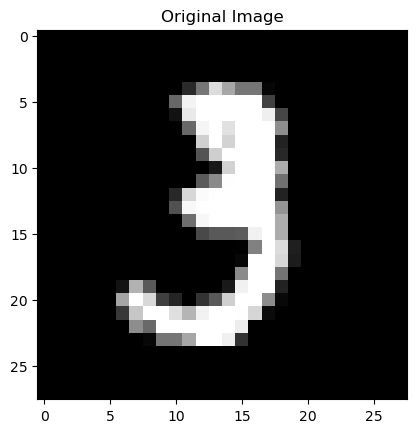

In [5]:
plt.imshow(array1,cmap='gray')
plt.title('Original Image')

In [1]:
def apply_high_pass_filtering(image,kernel):
    padded_image = np.pad(image,((1,1),(1,1)), mode='constant', constant_values=0)
    filtered_image =np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i,j] = np.clip(np.sum(padded_image[i:i+3,j:j+3]*kernel),0,255)
    return filtered_image

Text(0.5, 1.0, 'High pass filter image')

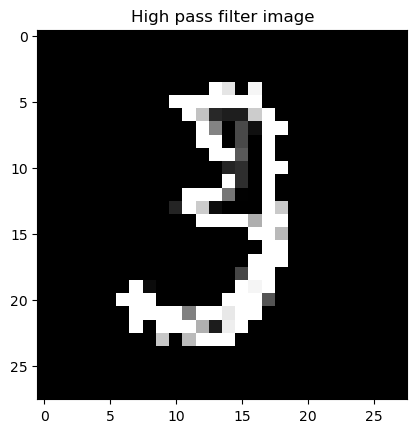

In [7]:
high_pass_kernal = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])
high_pass = apply_high_pass_filtering(array1,high_pass_kernal)
plt.imshow(high_pass,cmap='gray')
plt.title('High pass filter image')

In [8]:
def apply_high_boost_filtering(image,kernel):
    padded_image = np.pad(image,((1,1),(1,1)),mode='constant',constant_values=0)
    filtered_image =np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i,j] = np.sum(padded_image[i:i+3,j:j+3]*kernel)
    return np.clip(filtered_image,0,255)

In [9]:

def high_boost_filter_kernel(A):
    w = 9 * A - 1
    kernel = np.array([
        [-1, -1, -1],
        [-1, w, -1],
        [-1, -1, -1]
    ]) / 9  
    return kernel

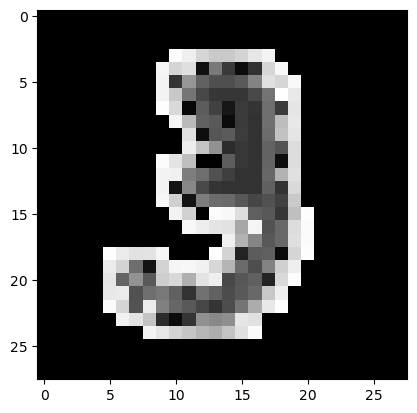

In [10]:
A = 1.2  
kernel = high_boost_filter_kernel(A)
high_boost_image = apply_high_boost_filtering(array1, kernel)
high_boost_image= Image.fromarray(high_boost_image)
plt.imshow(high_boost_image,cmap='gray')